<a href="https://colab.research.google.com/github/Sanskriti-1711/CAT/blob/master/Copy_of_ACGPN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For inferencing ACGPN!

ACGPN repo: https://github.com/switchablenorms/DeepFashion_Try_On

This notebook is hard coded for inferencing one image at a time.

Notebook by [Levin Dabhi](https://levindabhi.github.io/)

# ACGPN

In [1]:
!apt-get install python3.7

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3.7 is already the newest version (3.7.13-1+bionic3).
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.


In [2]:
!git clone https://github.com/levindabhi/ACGPN.git
%cd ACGPN

Cloning into 'ACGPN'...
remote: Enumerating objects: 161, done.
remote: Counting objects: 100% (161/161), done.
remote: Compressing objects: 100% (139/139), done.
remote: Total 161 (delta 61), reused 84 (delta 17), pack-reused 0
Receiving objects: 100% (161/161), 303.18 KiB | 4.04 MiB/s, done.
Resolving deltas: 100% (61/61), done.
/content/ACGPN


In [3]:
!pip install ninja

     |████████████████████████████████| 108 kB 4.7 MB/s 


In [4]:
import gdown
import numpy as np
from PIL import Image
import IPython
import gdown
import os
import sys

from predict_pose import generate_pose_keypoints

In [5]:
#gdown.download('https://drive.google.com/uc?id=1tE7hcVFm8Td8kRh5iYRBSDFdvZIkbUIR', 'Data_preprocessing/data.zip', quiet=False)
#%cd Data_preprocessing
#!unzip data
#%cd ..


In [6]:
!mkdir Data_preprocessing/test_color
!mkdir Data_preprocessing/test_colormask
!mkdir Data_preprocessing/test_edge
!mkdir Data_preprocessing/test_img
!mkdir Data_preprocessing/test_label
!mkdir Data_preprocessing/test_mask
!mkdir Data_preprocessing/test_pose
!mkdir inputs
!mkdir inputs/img
!mkdir inputs/cloth

In [7]:
%cd pose
!gdown --id 1hOHMFHEjhoJuLEQY0Ndurn5hfiA9mwko
%cd ..

/content/ACGPN/pose
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1hOHMFHEjhoJuLEQY0Ndurn5hfiA9mwko
To: /content/ACGPN/pose/pose_iter_440000.caffemodel
100% 209M/209M [00:02<00:00, 98.9MB/s]
/content/ACGPN


In [8]:
!git clone https://github.com/levindabhi/Self-Correction-Human-Parsing-for-ACGPN.git
!git clone https://github.com/levindabhi/U-2-Net.git

Cloning into 'Self-Correction-Human-Parsing-for-ACGPN'...
remote: Enumerating objects: 769, done.
remote: Counting objects: 100% (66/66), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 769 (delta 51), reused 40 (delta 40), pack-reused 703
Receiving objects: 100% (769/769), 3.80 MiB | 16.08 MiB/s, done.
Resolving deltas: 100% (186/186), done.
Cloning into 'U-2-Net'...
remote: Enumerating objects: 822, done.
remote: Counting objects: 100% (383/383), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 822 (delta 344), reused 320 (delta 320), pack-reused 439
Receiving objects: 100% (822/822), 30.71 MiB | 31.16 MiB/s, done.
Resolving deltas: 100% (388/388), done.


In [9]:
#for segmentation mask generation
url = 'https://drive.google.com/uc?id=1k4dllHpu0bdx38J7H28rVVLpU-kOHmnH'
output = 'lip_final.pth'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1k4dllHpu0bdx38J7H28rVVLpU-kOHmnH
To: /content/ACGPN/lip_final.pth
100%|██████████| 267M/267M [00:02<00:00, 123MB/s]


'lip_final.pth'

In [10]:
%cd U-2-Net
!mkdir saved_models
!mkdir saved_models/u2net
!mkdir saved_models/u2netp
!gdown --id 1rbSTGKAE-MTxBYHd-51l2hMOQPT_7EPy -O saved_models/u2netp/u2netp.pth
!gdown --id 1ao1ovG1Qtx4b7EoskHXmi2E9rp5CHLcZ -O saved_models/u2net/u2net.pth
import u2net_load
import u2net_run
u2net = u2net_load.model(model_name = 'u2netp')
%cd ..

/content/ACGPN/U-2-Net
mkdir: cannot create directory ‘saved_models’: File exists
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1rbSTGKAE-MTxBYHd-51l2hMOQPT_7EPy
To: /content/ACGPN/U-2-Net/saved_models/u2netp/u2netp.pth
100% 4.68M/4.68M [00:00<00:00, 176MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1ao1ovG1Qtx4b7EoskHXmi2E9rp5CHLcZ
To: /content/ACGPN/U-2-Net/saved_models/u2net/u2net.pth
100% 176M/176M [00:00<00:00, 233MB/s]
...load U2NEP---4.7 MB
/content/ACGPN


In [11]:
!mkdir checkpoints
gdown.download('https://drive.google.com/uc?id=1UWT6esQIU_d4tUm8cjxDKMhB8joQbrFx',output='checkpoints/ACGPN_checkpoints.zip', quiet=False)
%cd checkpoints
!unzip ACGPN_checkpoints
%cd ..

Downloading...
From: https://drive.google.com/uc?id=1UWT6esQIU_d4tUm8cjxDKMhB8joQbrFx
To: /content/ACGPN/checkpoints/ACGPN_checkpoints.zip
100%|██████████| 524M/524M [00:02<00:00, 202MB/s]


/content/ACGPN/checkpoints
Archive:  ACGPN_checkpoints.zip
   creating: label2city/
  inflating: label2city/latest_net_G.pth  
  inflating: label2city/latest_net_G1.pth  
  inflating: label2city/latest_net_G2.pth  
  inflating: label2city/latest_net_U.pth  
  inflating: label2city/opt.txt      
/content/ACGPN


### Please upload your cloth image below

In [12]:
%cd inputs/cloth
from google.colab import files
uploaded = files.upload()
%cd ..
%cd ..

/content/ACGPN/inputs/cloth


Saving 000074_1.jpg to 000074_1.jpg
/content/ACGPN/inputs
/content/ACGPN


### Please upload your person image below

In [13]:
%cd inputs/img
from google.colab import files
uploaded = files.upload()
%cd ..
%cd ..

/content/ACGPN/inputs/img


Saving 000082_0.jpg to 000082_0.jpg
/content/ACGPN/inputs
/content/ACGPN


In [14]:
sorted(os.listdir('inputs/cloth'))

['000074_1.jpg']

In [15]:
cloth_name = '000001_1.png'
cloth_path = os.path.join('inputs/cloth', sorted(os.listdir('inputs/cloth'))[0])
cloth = Image.open(cloth_path)
cloth = cloth.resize((192, 256), Image.BICUBIC).convert('RGB')
cloth.save(os.path.join('Data_preprocessing/test_color', cloth_name))

u2net_run.infer(u2net, 'Data_preprocessing/test_color', 'Data_preprocessing/test_edge')

Generating mask for: 000001_1.png
Saving output at Data_preprocessing/test_edge/000001_1.png


In [16]:
sorted(os.listdir('inputs/img'))

['000082_0.jpg']

In [17]:
import time

start_time = time.time()
img_name = '000001_0.png'
img_path = os.path.join('inputs/img', sorted(os.listdir('inputs/img'))[0])
img = Image.open(img_path)
img = img.resize((192,256), Image.BICUBIC)

img_path = os.path.join('Data_preprocessing/test_img', img_name)
img.save(img_path)
resize_time = time.time()
print('Resized image in {}s'.format(resize_time-start_time))

!python3 Self-Correction-Human-Parsing-for-ACGPN/simple_extractor.py --dataset 'lip' --model-restore 'lip_final.pth' --input-dir 'Data_preprocessing/test_img' --output-dir 'Data_preprocessing/test_label'
parse_time = time.time()
print('Parsing generated in {}s'.format(parse_time-resize_time))

pose_path = os.path.join('Data_preprocessing/test_pose', img_name.replace('.png', '_keypoints.json'))
generate_pose_keypoints(img_path, pose_path)
pose_time = time.time()
print('Pose map generated in {}s'.format(pose_time-parse_time))

Resized image in 0.017231225967407227s
100% 1/1 [00:00<00:00,  2.89it/s]
Parsing generated in 73.98712420463562s
File saved at Data_preprocessing/test_pose/000001_0_keypoints.json
Pose map generated in 9.873125076293945s


In [18]:
!rm -rf Data_preprocessing/test_pairs.txt
with open('Data_preprocessing/test_pairs.txt','w') as f:
    f.write('000001_0.png 000001_1.png')

In [19]:
!python test.py

?
------------ Options -------------
aspect_ratio: 1.0
batchSize: 1
checkpoints_dir: ./checkpoints
cluster_path: features_clustered_010.npy
continue_train: False
data_type: 32
datapairs: test_pairs.txt
dataroot: Data_preprocessing/
display_winsize: 512
engine: None
export_onnx: None
fineSize: 512
gpu_ids: [0]
how_many: 1000
input_nc: 3
isTrain: False
label_nc: 20
loadSize: 512
max_dataset_size: inf
model: pix2pixHD
nThreads: 1
n_blocks_global: 4
n_blocks_local: 3
n_downsample_global: 4
n_local_enhancers: 1
name: label2city
netG: global
ngf: 64
niter_fix_global: 0
no_flip: False
norm: instance
ntest: inf
onnx: None
output_nc: 3
phase: test
resize_or_crop: scale_width
results_dir: ./results/
serial_batches: True
tf_log: False
use_dropout: False
use_encoded_image: False
verbose: False
which_epoch: latest
-------------- End ----------------
CustomDatasetDataLoader
dataset [AlignedDataset] was created
Data_preprocessing/test_label label
Data_preprocessing/test_img img
Data_preprocessing/tes

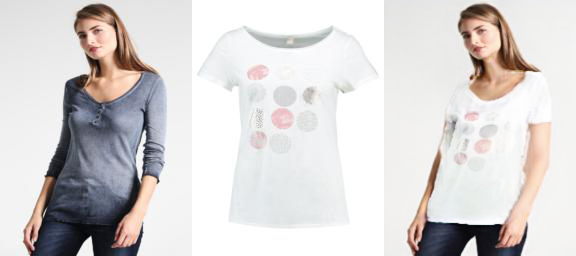

In [20]:
output_grid = np.concatenate([np.array(Image.open('Data_preprocessing/test_img/000001_0.png')),
                np.array(Image.open('Data_preprocessing/test_color/000001_1.png')),
                np.array(Image.open('results/test/try-on/000001_0.png'))], axis=1)
image_grid = Image.fromarray(output_grid)
image_grid

### Check results in 'results' folder!

**Deleting all images**

In [21]:
!rm -rf Data_preprocessing/test_color/*
!rm -rf Data_preprocessing/test_colormask/*
!rm -rf Data_preprocessing/test_edge/*
!rm -rf Data_preprocessing/test_img/*
!rm -rf Data_preprocessing/test_label/*
!rm -rf Data_preprocessing/test_mask/*
!rm -rf Data_preprocessing/test_pose/*
!rm -rf inputs/cloth/*
!rm -rf inputs/img/*

In [22]:
!rm -rf results/*

In [ ]:
%cd /content/

/content
